## Importing the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

## Loading and Preparation of Data

In [27]:
df = pd.read_csv('D:/BIA Data Science & AI/ML/ny_taxi_data.csv')

In [29]:
# predicting passenger count

data = df['passenger_count'].values

## Data Preprocessing

In [32]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

sequence_length = 5
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [34]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size = 0.2, random_state = 42)

## Building and training RNN Model

In [37]:
model_rnn = keras.Sequential(name = 'RNN')
model_rnn.add(keras.layers.SimpleRNN(100, activation = 'relu', input_shape = (X_train.shape[1], 1)))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\watad\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model_rnn.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)

In [41]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [43]:
mse_rnn = evaluate_model(model_rnn, X_test, y_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [45]:
print(f"RNN Mean Squared Error: {mse_rnn}")

RNN Mean Squared Error: 1.7084790586307217


## Build and Train LSTM Model

In [48]:
model_lstm = keras.Sequential(name = 'LSTM')
model_lstm.add(keras.layers.LSTM(100, activation = 'relu', input_shape = (X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\watad\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model_lstm.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)

In [57]:
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
print(f"LSTM Mean Squared Error: {mse_lstm}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
LSTM Mean Squared Error: 1.6718681703585885


## Building and Training GRU Model

In [53]:
model_gru = keras.Sequential(name = 'GRU')
model_gru.add(keras.layers.GRU(100, activation = 'relu', input_shape = (X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\watad\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model_gru.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)

In [59]:
mse_gru = evaluate_model(model_gru, X_test, y_test)
print(f"GRU Mean Squared Error: {mse_gru}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
GRU Mean Squared Error: 1.6725704673981385


## Visualizing the Models

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


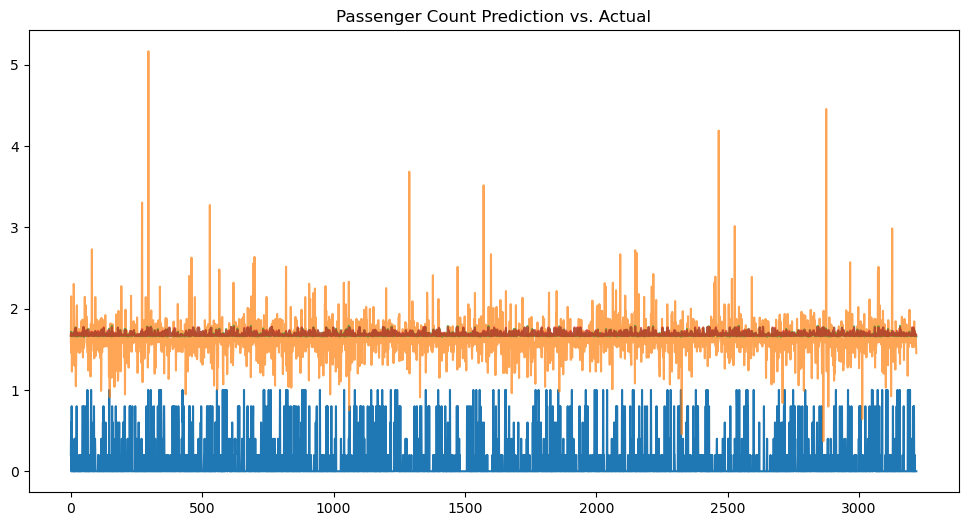

In [71]:
# RNN
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

#LSTM
y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

#GRU
y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize = (12, 6))
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred_rnn, label = 'RNN Predicted', alpha = 0.7)
plt.plot(y_pred_lstm, label = 'LSTM Predicted', alpha = 0.7)
plt.plot(y_pred_gru, label = 'GRU Predicted', alpha = 0.7)
plt.title('Passenger Count Prediction vs. Actual')
plt.show()